<a href="https://colab.research.google.com/github/ClovisMonteiro/Redes_neurais/blob/master/Classifica%C3%A7%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação Linear

In [0]:
import numpy as np
import matplotlib as plt

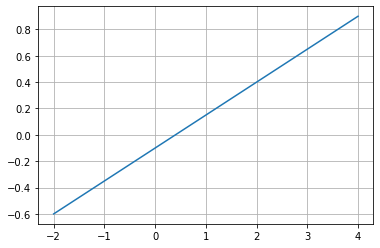

In [0]:
a = -1
b = 4
c = 0.4

# ax + by + c = 0
# y = (-a*x - c ) / b

x = np.linspace(-2,4,50)
y = (-a*x - c ) / b

plt.pyplot.plot(x,y)
plt.pyplot.grid(True)

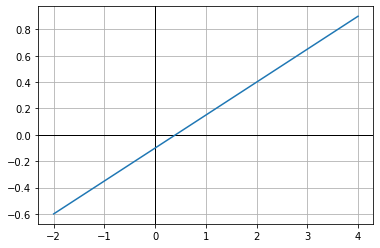

In [0]:
plt.pyplot.axvline(0, -1,1, color = "k", linewidth = 1)
plt.pyplot.axhline(0, -2,4, color = "k", linewidth = 1)
plt.pyplot.plot(x,y)
plt.pyplot.grid(True)

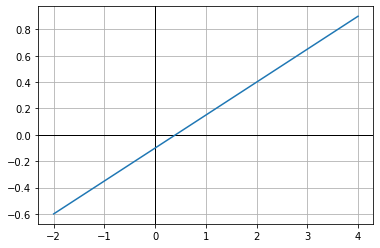

In [0]:
a = -1
b = 4
c = 0.4

def plotar_linha(a,b,c):
  x = np.linspace(-2,4,50)
  y = (-a*x - c ) / b

  plt.pyplot.axvline(0, -1,1, color = "k", linewidth = 1)
  plt.pyplot.axhline(0, -2,4, color = "k", linewidth = 1)
  plt.pyplot.plot(x,y)
  plt.pyplot.grid(True)

plotar_linha(a,b,c)

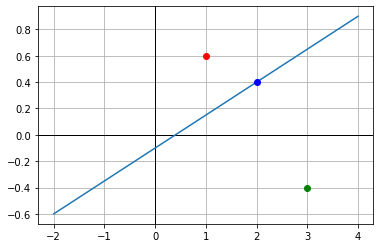

In [0]:
#Ao definir critérios para classificar qualquer tipo de dados, a equação da reta pode retornar informações valiosas

p1 = (2, 0.4)
p2 = (1, 0.6)
p3 = (3, -0.4)

plotar_linha(a,b,c)
plt.pyplot.plot(p1[0], p1[1], color ='b', marker = 'o')
plt.pyplot.plot(p2[0], p2[1], color ='r', marker = 'o')
plt.pyplot.plot(p3[0], p3[1], color ='g', marker = 'o')

In [0]:
#Qualquer ponto que escolher em cima da reta, o valor será 0
ret1 = a * p1[0] + b *p1[1] + c
ret2 = a * p2[0] + b *p2[1] + c
ret3 = a * p3[0] + b *p3[1] + c

print('Ponto azul: %.2f' %ret1)
print('Ponto  Vermelho: %.2f' %ret2)
print('Ponto verde: %.2f' %ret3)

Ponto azul: 0.00
Ponto  Vermelho: 1.80
Ponto verde: -4.20


In [0]:
# Explicação:

#f(x) = 0 - Define os pontos na reta
#f(x) > 0 - Define os pontos acima da reta
#f(x) < 0 - Define os pontos abaixo da reta

# Modo Linear

A reta pode ser interpretada como modelo linear, que nada mais é do que uma função de mapeamento X -> Y, que mapeia cada ponto em X para um ponto Y. Em outras palavras, dados os Parametros W = {w1, w2} e b de uma reta, é possivel mapear cada uma entrada X = {x1, x2} para uma saída f(x; W; b).

O perceptron é um tipo de modelo que utiliza a Claificação linear, a unica diferença é a troca do "X", para o "w".

Somatório de W em um X 

![Resumo do perceptron](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1600%2F1*umjlzp_KFd_peMOa2J4xlA.png&f=1&nofb=1)

À partir desse modelo, podemos definir uma entrada com D dimensões, e a função de mapeamento é o modelo linear de um somatório entre essas variavéis:

```
y = x1*w1 +  x2*w2 + b
```
```
y = x1*w1 +  x2*w2 + x3*w3 + b
```
```
y = x1*w1 +  x2*w2 + x3*w3 + x4*w4 + b
```


#Iniciando com Scikit-Learning

Documentação: https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html

A célula a seguir produz uma distribuição aleatória para um problema de classificação com duas classes, usando a função make_classification() do sklearn.

0


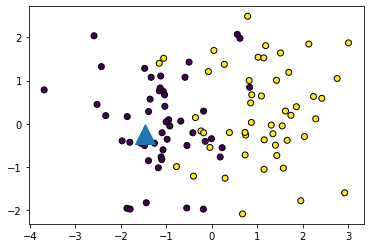

In [0]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1, n_clusters_per_class = 1)
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c=Y, edgecolor = 'k')

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize = 20)


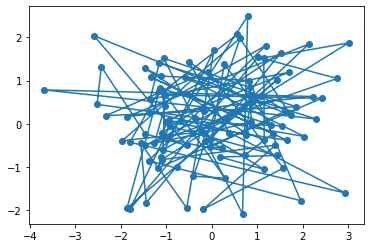

In [0]:
plt.plot(X[:, 0], X[:, 1], marker = 'o')

O gráfico acima não fica bem representado por conta das linhas que a função plot cria, o mais indicado é o gráfico scatter

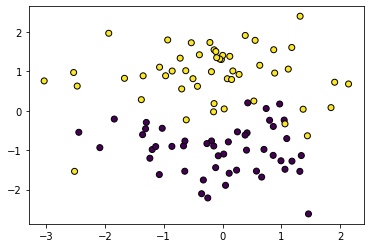

In [0]:
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c=Y, edgecolor = 'k')

Encontrando os melhores parâmetros(W,b) de um modelo linear para classificar a distribuição gerada. O ideal é não fazer por tentativa e erro, mas prestar atenção no impacto de cada mudaça realizada. É importante notar que os pesos W são componentes angulares do modelo, enquanto o viés B é o componente linear que desloca a reta no espaço.

-4.4


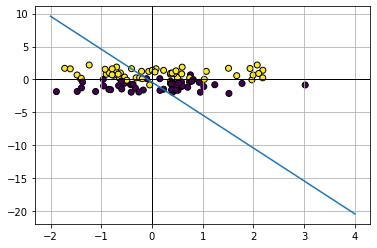

In [0]:
def plotar_modelo(w1,w2,b):
  x = np.linspace(-2,4,50)
  y = (-w1*x - c ) / w2
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_xlim()

  plt.axvline(0, -1,1, color = "k", linewidth = 1)
  plt.axhline(0, -2,4, color = "k", linewidth = 1)
  plt.plot(x,y)
  plt.grid(True)

  plt.scatter(X[:, 0], X[:, 1], marker = 'o', c=Y, edgecolor = 'k')
w1 = 5 #a
w2 = 1 #b
b =  -0.4 #c

plotar_modelo(w1,w2,b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] +b)

1 yellow


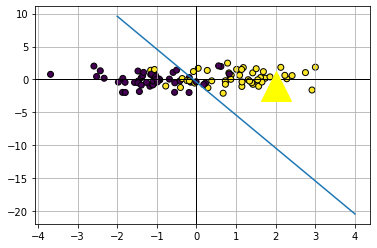

In [0]:
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] +b

  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'


p = (2,-1)
classe, cor = classify (p, w1, w2, b)
print(classe, cor)

plotar_modelo(w1,w2,b)
plt.plot(p[0],p[1],marker = '^', color = cor, markersize=30)


Estando com a função classify() é possivel agora classificar cada um dos pontos gerados aleatoriamente pelo make_classification, calculando assim a acurácia do nosso modelo

In [0]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2,b)
  if categ == Y[k]:
    acertos+=1

print("Acurácia: {0}%".format(100*acertos/len(X)))

Acurácia: 87.0%


### Criando um novo modelo para classificar

1


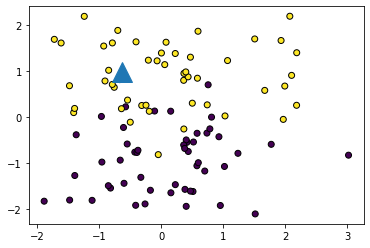

In [0]:
np.random.seed(30)

X, Y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1, n_clusters_per_class = 1)
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c=Y, edgecolor = 'k')

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize = 20)


2.6


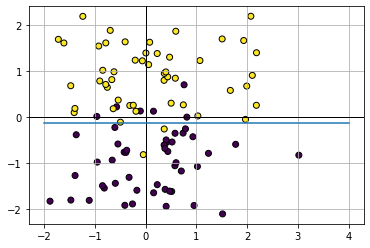

In [0]:
def plotar_modelo(w1,w2,b):
  x = np.linspace(-2,4,50)
  y = (-w1*x - c ) / w2
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_xlim()

  plt.axvline(0, -1,1, color = "k", linewidth = 1)
  plt.axhline(0, -2,4, color = "k", linewidth = 1)
  plt.plot(x,y)
  plt.grid(True)

  plt.scatter(X[:, 0], X[:, 1], marker = 'o', c=Y, edgecolor = 'k')
w1 = 0 #a
w2 = 3 #b
b =  -0.4 #c

plotar_modelo(w1,w2,b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] +b)

In [0]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2,b)
  if categ == Y[k]:
    acertos+=1

print("Acurácia: {0}%".format(100*acertos/len(X)))

Acurácia: 91.0%
